# Hydrophobic interactions

In [1]:
import openpharmacophore as oph

In [2]:
pdb_path = "../../data/1m7w_A_chain.pdb"

In [3]:
protein = oph.load(pdb_path)
print(f"Has hydrogens: {protein.has_hydrogens()}")
print(f"Has ligand: {protein.has_ligands()}")

Has hydrogens: False
Has ligand: True


In [4]:
lig_ids = protein.ligand_ids()
print(lig_ids)

['DAO:B']


In [5]:
smiles = oph.smiles_from_pdb_id(lig_ids[0])
smiles

'CCCCCCCCCCCC(=O)O'

[13:46:14] WARNING: More than one matching pattern found - picking one



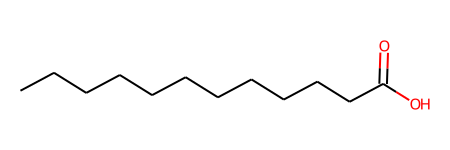

In [6]:
ligand = protein.get_ligand(lig_ids[0])
ligand.fix_bond_order(smiles=smiles)

ligand.draw()

In [7]:
protein.remove_ligand(lig_ids[0])
print(f"Has ligand: {protein.has_ligands}")

Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7f5bedcdb950>>


In [8]:
bsite = oph.ComplexBindingSite(protein, ligand)

In [9]:
pharmacophore = oph.LigandReceptorPharmacophore(bsite, ligand)
pharmacophore.extract(feat_types=["hydrophobicity"])

In [10]:
print(f"Number of pharmacophoric points {len(pharmacophore[0])}")
for p in pharmacophore[0]:
    print(p)

Number of pharmacophoric points 5
PharmacophoricPoint(feat_type=hydrophobicity; center=(64.61, 33.63, 10.33); radius=1.0)
PharmacophoricPoint(feat_type=hydrophobicity; center=(64.0, 33.95, 8.65); radius=1.0)
PharmacophoricPoint(feat_type=hydrophobicity; center=(62.71, 27.31, 13.27); radius=1.0)
PharmacophoricPoint(feat_type=hydrophobicity; center=(64.26, 29.96, 13.92); radius=1.0)
PharmacophoricPoint(feat_type=hydrophobicity; center=(65.22, 31.7, 13.23); radius=1.0)


In [11]:
viewer = oph.Viewer()
viewer.add_components([bsite, ligand, pharmacophore[0]])
view = viewer.show()
viewer.set_protein_style("ball+stick")
view

NGLWidget()

<img src="../../../../_static/hydrophobic_interaction.png" alt="pharmacophore">
<div class="alert alert-info">
    <strong>Note:</strong>
    <p>viewer.show() displays an interactive widget. For simplicity an image is presented in the documentation.</p>
</div>

In [12]:
# Save view image so it can be viewed in the documentation
 
import time
import threading

save = False

def save_image(view):
    im = view.render_image()
    while not im.value:
        time.sleep(0.1)
    save_path = "../../../../_static/hydrophobic_interaction.png"
    with open(save_path, "wb") as fp:
        fp.write(im.value)    

def generate_image():
    thread = threading.Thread(target=save_image, args=(viewer.to_nglview(),), daemon=True)
    thread.start()
    

if save:
    generate_image()